Features:

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary 
|
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [2]:
#Carregando os datasets
data = pd.read_csv('cardio_train.csv', sep=";")

In [3]:
#Verificando o numero de linhas e colunas
data.shape

(70000, 13)

In [4]:
#Verificando as 5 primeiras linhas 
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#Verificando a existência de variáveis null
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:

data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Engenharia de Atributos - Variáveis Quantitativas

In [7]:
# Variáveis quantitativas
int_cols = ['age', 
            'height', 
            'weight', 
            'ap_hi',
            'ap_lo']

In [8]:
# Calcula a correlação
corr = data[int_cols].corr()

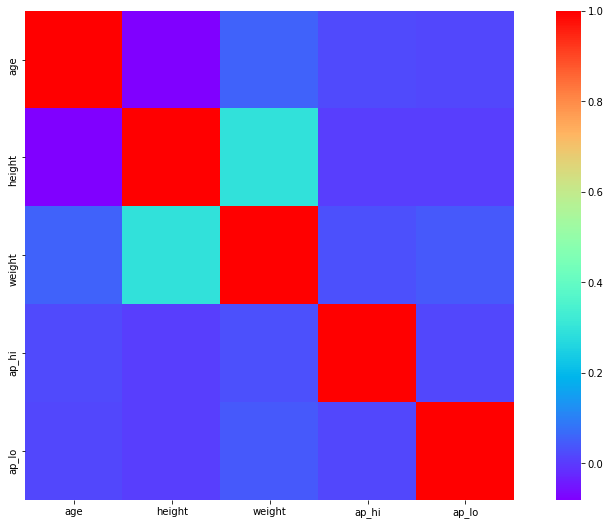

In [9]:
# Cria o mapa de calor com a matriz de correlação
f, ax = plt.subplots(figsize = (15, 9))
sns.heatmap(corr, vmax = 1, square = True, cmap = 'rainbow')
plt.show()

In [10]:
data['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [11]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [12]:
#data.drop('ap_lo', axis=1, inplace= True)

In [13]:
data.drop('id', axis=1, inplace= True)

In [14]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>]], dtype=object)

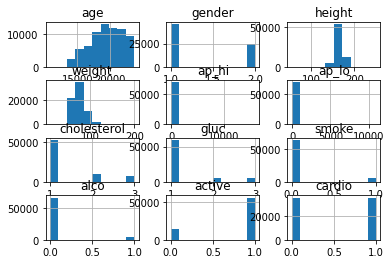

In [15]:
data.hist()

<AxesSubplot:xlabel='gender', ylabel='count'>

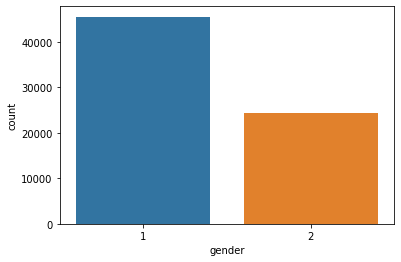

In [16]:
sns.countplot(data['gender'])

In [17]:
#Correlação
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


<AxesSubplot:xlabel='cholesterol', ylabel='count'>

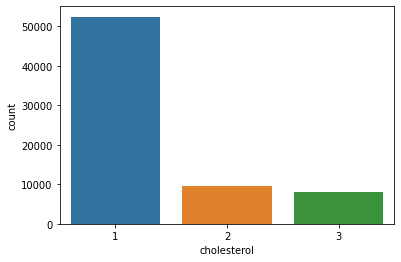

In [18]:
sns.countplot(data['cholesterol'])

<AxesSubplot:xlabel='gluc', ylabel='count'>

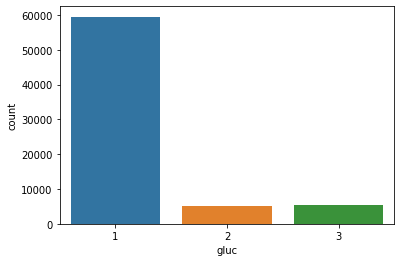

In [19]:
sns.countplot(data['gluc'])

<AxesSubplot:xlabel='smoke', ylabel='count'>

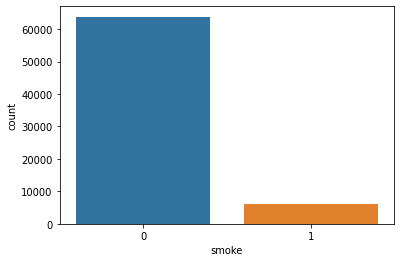

In [20]:
sns.countplot(data['smoke'])

<AxesSubplot:xlabel='alco', ylabel='count'>

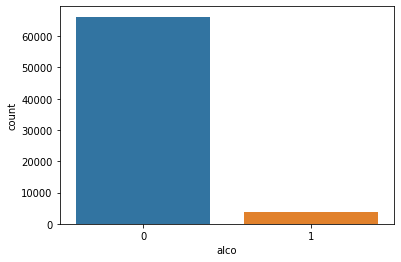

In [21]:
sns.countplot(data['alco'])

<AxesSubplot:xlabel='active', ylabel='count'>

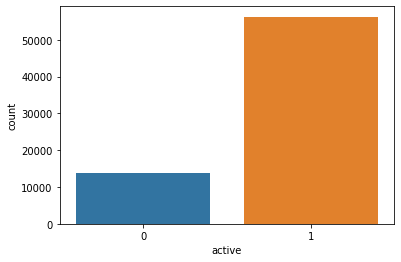

In [22]:
sns.countplot(data['active'])

<AxesSubplot:xlabel='cardio', ylabel='count'>

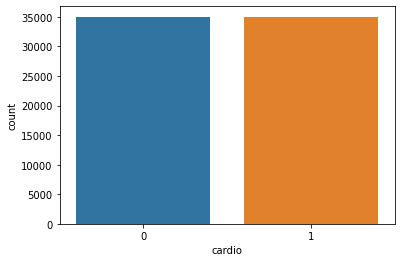

In [23]:
sns.countplot(data['cardio'])

In [24]:
#data["imc"] = data["weight"]/ (data["height"]/100)**2

In [25]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Engenharia de Atributos - Variáveis Qualitativas

In [26]:
# Variáveis quantitativas
int_cols2 = ['age', 
            'weight', 
            'ap_hi',
            'ap_lo']

In [27]:
# Primeiro filtramos as variáveis do tipo inteiro
dataset_clean = data.drop(int_cols, axis = 1)

In [28]:
# colocamos os valores das variáveis binárias como float
for col in dataset_clean.columns:
    dataset_clean[col] = dataset_clean[col].apply(lambda x: float(x))

In [29]:
# Shape
dataset_clean.shape

(70000, 7)

In [30]:
# Visualiza os dados
dataset_clean.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,2.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,3.0,1.0,0.0,0.0,1.0,1.0
2,1.0,3.0,1.0,0.0,0.0,0.0,1.0
3,2.0,1.0,1.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Recursos Binários: Visualizando os 1s (os valores restantes são 0.)')

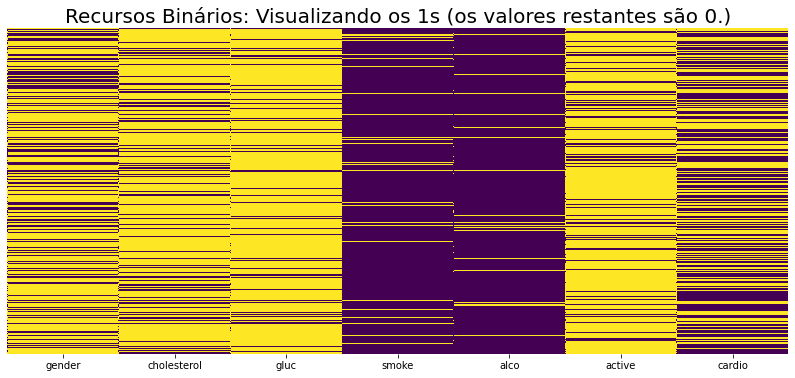

In [31]:
# Plot
plt.figure(figsize = (14,6))
p = sns.heatmap(dataset_clean == 1, yticklabels = False, cbar = False, cmap = 'viridis')
p.axes.set_title("Recursos Binários: Visualizando os 1s (os valores restantes são 0.)", fontsize = 20)

In [32]:
# Função para calcular a associação entre variáveis categóricas

# Pacote stats do Scipy
import scipy.stats as ss

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

# Em Estatística, Cramér-V é uma medida de associação entre duas variáveis categóricas, fornecendo um valor 
# entre 0 e +1 (inclusive). É baseado na estatística do qui-quadrado (chi2) de Pearson e foi publicado 
# por Harald Cramér em 1946. 

# A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [33]:
# Coleta o nome das colunas do dataset

# Lista
categorical_vars = []

# Loop
for column in dataset_clean:
    categorical_vars.append(column)

In [34]:
# Variável alvo
y = 'cardio'

# Print
print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

# Loop
for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(dataset_clean[var], dataset_clean[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável gender com a variável resposta: 0.007140984138192398
Associação da Variável cholesterol com a variável resposta: 0.22108459105726172
Associação da Variável gluc com a variável resposta: 0.09141116970410079
Associação da Variável smoke com a variável resposta: 0.014965735354595095
Associação da Variável alco com a variável resposta: 0.006206645866171115
Associação da Variável active com a variável resposta: 0.03541641750397704
Associação da Variável cardio com a variável resposta: 0.9999714281529619


In [35]:
#Retirando as variáveis height e gender
data = data.drop('height', axis = 1)
data = data.drop('gender', axis = 1)

In [36]:
#Separando dados de treino e teste
X = data.drop("cardio", axis = 1)
y = data.cardio
test_size = 0.2
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size = test_size, random_state = 123)


In [37]:
# Vamos padronizar as variáveis de entrada

# Cria o padronizador
scaler = StandardScaler()

# Treina e aplica nos dados de treino
X_treino_scaled = scaler.fit_transform(X_treino.values)

# Apenas aplica nos dados de teste
X_teste_scaled = scaler.transform(X_teste.values)

# Predições

  # V1- Adaboost

In [38]:
#Cria o modelo
ab = AdaBoostClassifier(random_state = 123)

# Grid de parâmetros
gridparam_ab = {'n_estimators': [100,200,500], 'learning_rate': [0.2,0.5,1.0],}

# Grid Search
modelo_ab = GridSearchCV(ab, cv = 3, param_grid = gridparam_ab)

# Treinamento com Grid Search
modelo_ab.fit(X_treino_scaled, Y_treino)

# Previsões de classe
ab_Y_pred = modelo_ab.predict(X_teste_scaled)

# Previsões de probabilidade
ab_predict_proba = modelo_ab.predict_proba(X_teste_scaled)[:,1] 

In [39]:
# Verificando a acurácia do modelo

# Calcula o score com dados de teste
ab_accuracy = modelo_ab.score(X_teste_scaled, Y_teste) * 100

# Print
print("Acurácia do Modelo Adaboost (%):", ab_accuracy)

Acurácia do Modelo Adaboost (%): 72.93571428571428


In [40]:
# Melhores hiperparâmetros
print('Melhor Acurácia em Treino: ', modelo_ab.best_score_)
print('Melhores Hiperparâmetros: ', modelo_ab.best_params_)

Melhor Acurácia em Treino:  0.7300714366902415
Melhores Hiperparâmetros:  {'learning_rate': 1.0, 'n_estimators': 500}


In [41]:
# Cria e imprime a matriz de confusão
conf_matriz_ab = confusion_matrix(Y_teste, ab_Y_pred)
print(conf_matriz_ab)

# Calcula o total 
total1 = sum(sum(conf_matriz_ab))

# Calcula a acurácia
accuracy_ab = (conf_matriz_ab[0,0] + conf_matriz_ab[1,1]) / total1
    
# Calcula especificidade e sensibilidade
speci_ab = conf_matriz_ab[0,0] / (conf_matriz_ab[0,0] + conf_matriz_ab[0,1])
sensi_ab = conf_matriz_ab[1,1] / (conf_matriz_ab[1,0] + conf_matriz_ab[1,1])

# Print
print('\nAcurácia : ', accuracy_ab)
print('Sensibilidade :', sensi_ab)
print('Especificidade :', speci_ab)

[[5635 1407]
 [2382 4576]]

Acurácia :  0.7293571428571428
Sensibilidade : 0.6576602471974705
Especificidade : 0.8001988071570576


Text(0.5, 1.0, 'Acurácia: 0.7293571428571428')

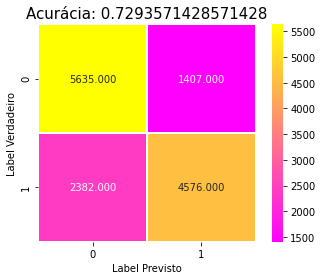

In [49]:
# Matriz de Confusão
sns.heatmap(confusion_matrix(Y_teste, ab_Y_pred), 
            annot = True, 
            fmt = ".3f", 
            linewidths = .5, 
            square = True, 
            cmap = 'spring')

# Labels e Títulos
plt.ylabel('Label Verdadeiro');
plt.xlabel('Label Previsto');
all_sample_title = 'Acurácia: {0}'.format(modelo_ab.score(X_teste_scaled, Y_teste))
plt.title(all_sample_title, size = 15)

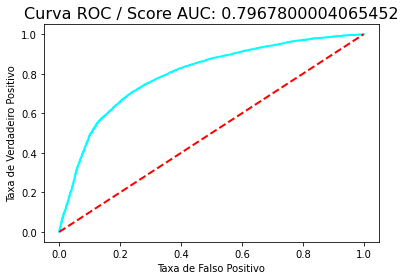

In [43]:
# Extrai as métricas para a Curva ROC
ab_fpr, ab_tpr, thresholds = roc_curve(Y_teste, ab_predict_proba)

# Calcula o AUC
ab_roc_auc = auc(ab_fpr, ab_tpr)

# Cria a figura para o Plot
plt.figure()

# Plot da Curva ROC
plt.plot(ab_fpr, ab_tpr, color = 'cyan', lw = 2, label = 'Curva ROC')

# Cria a linha base (linha tracejada em vermelho)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')

# Plot de FPR (Taxa de Falso Positivo) e TPR (Taxa de Verdadeiro Positivo)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plot_title = 'Curva ROC / Score AUC: {0}'.format(ab_roc_auc)
plt.title(plot_title , size = 16)
plt.show()

# V3- XGBoost

In [50]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

modelo_xg = xgb.XGBClassifier(learning_rate = 0.1, 
                              max_depth = 3, 
                              n_estimators = 100,
                             min_child_weight = 5,
                             gamma = 0.1,
                             reg_alpha=1,
                            reg_lambda=1.5)
modelo_xg.fit(X_treino_scaled,Y_treino)    
resultado2 = modelo_xg.predict_proba(X_teste_scaled)[:,1]
valores_previstos2 = modelo_xg.predict(X_teste_scaled)
score = roc_auc_score(Y_teste, resultado2)
score

0.804502645768717

In [51]:
from sklearn import metrics
print(metrics.classification_report(Y_teste,valores_previstos2 ))


              precision    recall  f1-score   support

           0       0.72      0.77      0.75      7042
           1       0.75      0.70      0.73      6958

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



from sklearn.model_selection import GridSearchCV
learning_rate = [0.1,0.05,0.01]
n_estimators = [100,300,500,1000]
valores_max_depth = [3,5,8,10]
gamma = [0,0.1,0.5]

parametros_grid = dict(n_estimators=n_estimators,
                       max_depth=valores_max_depth,
                       gamma=gamma,
                       learning_rate=learning_rate 
                      )

xg = xgb.XGBClassifier()
grid = GridSearchCV(xg, parametros_grid, cv=5, scoring='accuracy')
grid.fit(X_teste_scaled,Y_teste)

grid.best_params_

Text(0.5, 1.0, 'Acurácia: 0.7374285714285714')

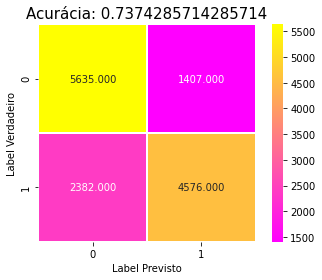

In [52]:
# Matriz de Confusão
sns.heatmap(confusion_matrix(Y_teste, ab_Y_pred), 
            annot = True, 
            fmt = ".3f", 
            linewidths = .5, 
            square = True, 
            cmap = 'spring')

# Labels e Títulos
plt.ylabel('Label Verdadeiro');
plt.xlabel('Label Previsto');
all_sample_title = 'Acurácia: {0}'.format(modelo_xg.score(X_teste_scaled, Y_teste))
plt.title(all_sample_title, size = 15)

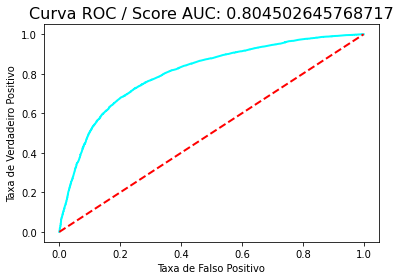

In [53]:
# Extrai as métricas para a Curva ROC
ab_fpr, ab_tpr, thresholds = roc_curve(Y_teste, resultado2)

# Calcula o AUC
ab_roc_auc = auc(ab_fpr, ab_tpr)

# Cria a figura para o Plot
plt.figure()

# Plot da Curva ROC
plt.plot(ab_fpr, ab_tpr, color = 'cyan', lw = 2, label = 'Curva ROC')

# Cria a linha base (linha tracejada em vermelho)
plt.plot([0, 1], [0, 1], color = 'red', lw = 2, linestyle = '--')

# Plot de FPR (Taxa de Falso Positivo) e TPR (Taxa de Verdadeiro Positivo)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plot_title = 'Curva ROC / Score AUC: {0}'.format(ab_roc_auc)
plt.title(plot_title , size = 16)
plt.show()

In [54]:
# Cria e imprime a matriz de confusão
conf_matriz_ab = confusion_matrix(Y_teste, valores_previstos2)
print(conf_matriz_ab)

# Calcula o total 
total1 = sum(sum(conf_matriz_ab))

# Calcula a acurácia
accuracy_ab = (conf_matriz_ab[0,0] + conf_matriz_ab[1,1]) / total1
    
# Calcula especificidade e sensibilidade
speci_ab = conf_matriz_ab[0,0] / (conf_matriz_ab[0,0] + conf_matriz_ab[0,1])
sensi_ab = conf_matriz_ab[1,1] / (conf_matriz_ab[1,0] + conf_matriz_ab[1,1])

# Print
print('\nAcurácia : ', accuracy_ab)
print('Sensibilidade :', sensi_ab)
print('Especificidade :', speci_ab)

[[5457 1585]
 [2091 4867]]

Acurácia :  0.7374285714285714
Sensibilidade : 0.6994826099453866
Especificidade : 0.7749218971882987
